# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-1b:)
- [code for plots](#Code-for-plots)

# Session 2:
## Effective ML

*Andreas Bjerre-Nielsen*

## Vaaaamos

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns


## Agenda
1. [model bias and variance](#Model-bias-and-variance)
1. [model building](#Model-building) 
1. model selection
  - [basic validation](#Model-selection)
  - [cross validation](#Cross-validation)
  - [tools for selection](#Tools-for-model-selection)


# Review


## Two agendas (1)

What are the objectives of empirical research? 

1. *causation*: what is the effect of a particular variable on an outcome? 
2. *prediction*: find some function that provides a good prediction of $y$ as a function of $x$

## Two agendas (2)

How might we express the agendas in a model?

$$ y = \alpha + \beta x + \varepsilon $$

- *causation*: interested in $\hat{\beta}$ 

- *prediction*: interested in $\hat{y}$ 


## Model fitting (1)
*How does over- and underfitting look like for regression?*

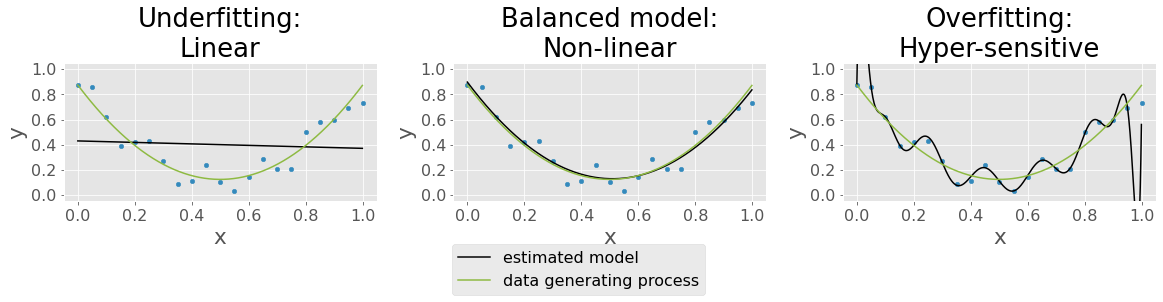

In [14]:
f_bias_var['regression'][2]

## Model fitting (2)
*What does underfitting and overfitting look like for classification?*

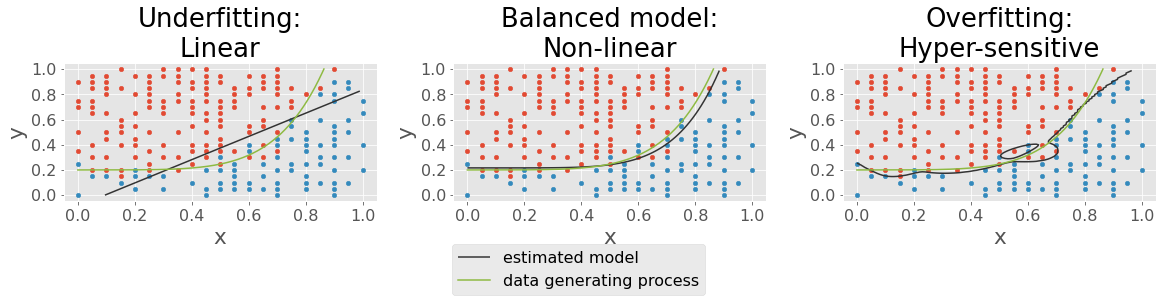

In [15]:
f_bias_var['classification'][2]

## What tools have seen?

- Supervised learning (having a target variable)
    - Classification problems: Perceptron, Adaline, Logistic regression    
    - Regression problems: Linear regression 

- We learned about optimization: gradient descent

- How can we say whether a model generalizes: 
    - We split data randomly into training and testing data.

## Fitting a polynomial (1)
Polyonomial: $f(x) = 2+8*x^4$

Try models of increasing order polynomials. 

- Split data into train and test (50/50)
- For polynomial order 0 to 9:
    - Iteration n: $y = \sum_{k=0}^{n}(\beta_k\cdot x^k)+\varepsilon$. (Taylor expansion)
    - Estimate order n model on training data
    - Evaluate with on test data with $\log RMSE$ ($= \log \sqrt{SSE/n}$)

## Fitting a polynomial (2)
We generate samples of data from true model (fourth order polynomial).

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fct(X):
    return 2+X**4

n_samples = 25
np.random.seed(0)

X_train = np.random.normal(size=(n_samples,1))
y_train = true_fct(X_train).reshape(-1) + np.random.randn(n_samples) 

X_test = np.random.normal(size=(n_samples,1))
y_test = true_fct(X_test).reshape(-1) + np.random.randn(n_samples)

## Fitting a polynomial (3)
We estimate the polynomials and store MSE for train and test:

In [17]:
from sklearn.metrics import mean_squared_error as mse

test_mse = []
train_mse = []
parameters = []

max_degree = 15
degrees = range(max_degree+1)

for p in degrees:
    X_train_p = PolynomialFeatures(degree=p).fit_transform(X_train)
    X_test_p = PolynomialFeatures(degree=p).fit_transform(X_test)
    reg = LinearRegression().fit(X_train_p, y_train)
    train_mse += [mse(reg.predict(X_train_p),y_train)] 
    test_mse += [mse(reg.predict(X_test_p),y_test)]     
    parameters.append(reg.coef_)

## Fitting a polynomial (4)
*So what happens to the model performance in- and out-of-sample?*

Text(0, 0.5, 'Mean squared error')

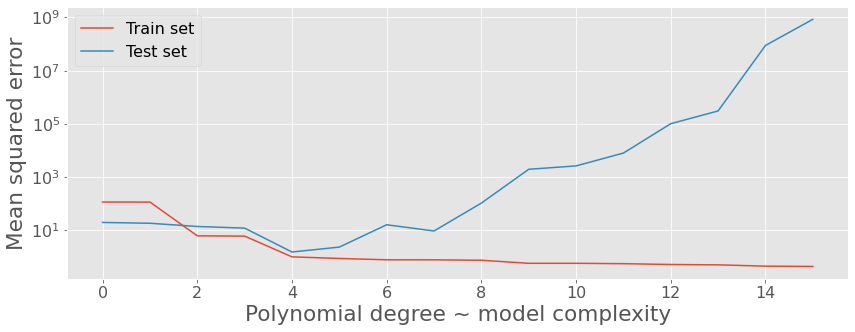

In [18]:
degree_index = pd.Index(degrees,name='Polynomial degree ~ model complexity')

ax = pd.DataFrame({'Train set':train_mse, 'Test set':test_mse})\
    .set_index(degree_index).plot(figsize=(14,5), logy=True)
ax.set_ylabel('Mean squared error')

## Fitting a polynomial (5)
*Quiz: Why does it go wrong on the test data?*

- more spurious parameters 
    - (we include variables beyond those in true model, i.e. $x^4$ and the bias term)
- the coefficient size increases (next slide)

## Fitting a polynomial (6)
*What do you mean coefficient size increase?*

Text(0, 0.5, 'Mean parameter size')

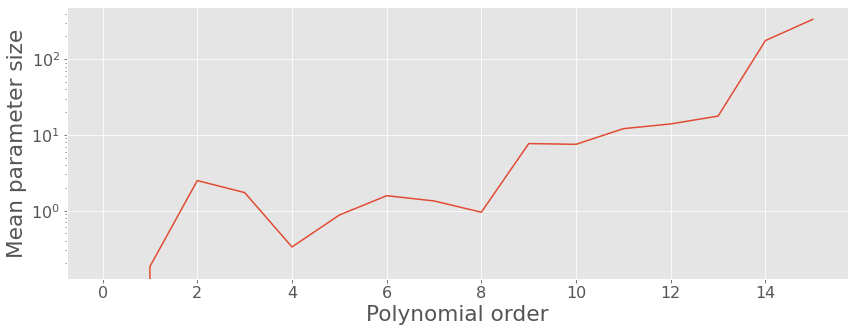

In [19]:
order_idx = pd.Index(range(len(degrees)),name='Polynomial order')
ax = pd.DataFrame(parameters,index=order_idx)\
.abs().mean(1).plot(figsize=(14,5),logy=True)
ax.set_ylabel('Mean parameter size')

## Fitting a polynomial (7)
*How else could we visualize this problem?*

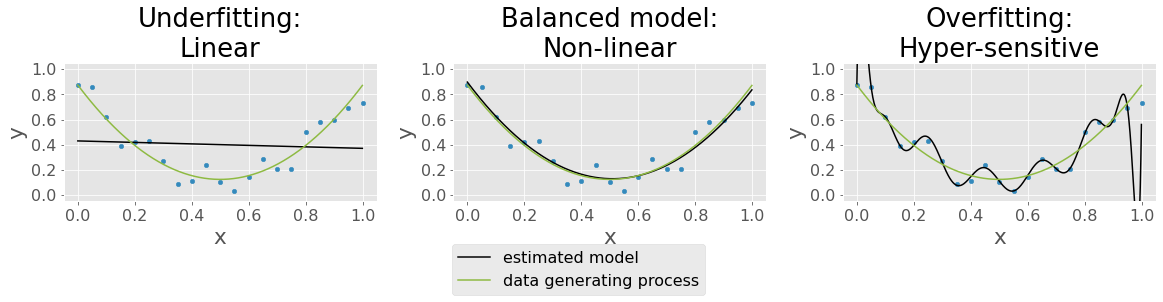

In [20]:
f_bias_var['regression'][2]

# The curse of overfitting and regularization

## Looking for a remedy
*How might we solve the overfitting problem?*

- too many number of variables (spurious relations)
- excessive magnitude of the coefficient size of variables 

Could we incorporate these two issues in our optimization problem?

## Regularization (1)

*Why do we regularize?*

- To mitigate overfitting > better model predictions

*How do we regularize?*

- We make models which are less complex:
  - reducing the **number** of coefficient;
  - reducing the **size** of the coefficients.

## Regularization (2)

*What does regularization look like?*

We add a penalty term our optimization procedure:
    
$$ \text{arg min}_\beta \, \underset{\text{MSE=SSE/n}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$

Introduction of penalties implies that increased model complexity has to be met with high increases precision of estimates.

## Regularization (3)

*What are some used penalty functions?*

The two most common penalty functions are L1 and L2 regularization.

- L1 regularization (***Lasso***): $R(\beta)=\sum_{j=1}^{p}|\beta_j|$ 
    - Makes coefficients sparse, i.e. selects variables by removing some (if $\lambda$ is high)
    
    
- L2 regularization (***Ridge***): $R(\beta)=\sum_{j=1}^{p}\beta_j^2$
    - Reduce coefficient size
    - Fast due to analytical solution
    
*To note:* The *Elastic Net* uses a combination of L1 and L2 regularization.

## Regularization (4)

*How the Lasso (L1 reg.) deviates from OLS*

<center><img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l1.png' alt="Drawing" style="width: 800px;"/></center>

## Regularization (5)

*How the Ridge regression (L2 reg.) deviates from OLS*

<center><img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l2.png' alt="Drawing" style="width: 550px;"/></center>

## Regularization (6)

*How might we describe the $\lambda$ of Lasso and Ridge?*

These are hyperparameters that we can optimize over. 


## Regularization (7)

*Is there a generalization of of Lasso and Ridge?*

Yes, the elastic net allows both types of regularization. Thererfore, it has two hyperparameters.

# Implementation details

## Underfitting remedies
*Is it possible to solve the underfitting problem?*

Yes, there are in general two ways.
- Using polynomial interactions of all features.
    - This is known as Taylor expansion
    - Note: we need to use regularization too curb impact of overfitting!
- Using non-linear models who can capture all patterns.
    - These are called universal approximators
    - Return to an overview of these in Session 14.

## Underfitting remedies (2)
*Some of the models we see here, e.g. Perceptrons, seem too simple - are they ever useful?*

- No, not for serious machine learning. 
- But for exposition (your learning), yes.
- However, the perceptron and related models are building blocks for building neural networks.


## The devils in the details (1)

*So we just run regularization?*

We need to rescale our features:
- convert to zero mean: 
- standardize to unit std: 

Compute in Python:
- option 1: `StandardScaler` in `sklearn` (RECOMMENDED)
- option 2: `(X - np.mean(X)) / np.std(X)`



## The devils in the details (2)
*So we just scale our test and train?*

# NO

Fit to the distribution in the **training data first**, then rescale train and test! See more [here](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

## The devils in the details (3)
*So we just rescale before using polynomial features?*

# NO

Otherwise the interacted varaibles are not gaussian distributed.

## The devils in the details (4)
*Does sklearn's `PolynomialFeatures` work for more than variable?*

# Model bias and variance

## Bias and variance (1)
*How do we describe the modelling error?*

From [Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) 2019:

- model **bias**: _an error from erroneous assumptions in the learning algorithm_
  - high bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**)
   

- model **variance**: _an error from sensitivity to small fluctuations in the training set_
  -  high variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (**overfitting**).
 

## Bias and variance (2)
*So what is overfitting?*

Overfitting is: low bias / high variance

- traning our model captures all patterns but we also find some irrelevant
- reacts too much to training sample errors 
    - some errors are just noise, and thus we find too many spurious relations 
- examples of causes: 
    - too much polynomial expansion of variables (`PolynomialFeatures`)
    - non-linear/logistic without properly tuned hyperparameters: 
        - Decision Trees, Support Vector Machines or Neural Networks

## Bias and variance (3)
*So what is underfitting?*

Underfitting is: high bias / low variance
- oversimplification of models, cannot approximate all patterns found
- examples of causes: 
    - linear and logistic regression (without polynomial expansion)

## Bias and variance (4)
*Not so fast.. OLS is unbiased, right?*

Yes, OLS is unbiased. But...?

- But .. only by assumption..
    - Requires we know the true form of the model. 
        - However, we never know do..

*What happens if we introduce regularization?*
- Then model is no longer unbiased.
    - (if we assume the model is true)

# Model building 

## Model pipelines (1)
*Is there a smart way to build ML models?*

Yes, we build a pipeline (input (tidy) -> target)
 
- Preprocessing data
    - Standard: adding polynomials, imputation, rescaling
    - Unsupervised learning 
- Supervised learning

## Model pipelines (2)
*How does the pipeline look? Is there data leakage?*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_01.png' alt="Drawing" style="width: 700px;"/></center>


## Model pipelines (3)
*What are the advantages of using a pipeline?*

- Ensures good practice - we only fit on training data. 
    - No leakage of data from train to test!
- Much less code!

## Applying a model pipeline (1)
*What would this look like in Python?*

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler())

print(pipe_preproc.steps[0])
print(pipe_preproc.steps[1])

('polynomialfeatures', PolynomialFeatures())
('standardscaler', StandardScaler())


## Applying a model pipeline (2)
*Does this remind you of something?*

# YES!

### Method chaining from Pandas

## Applying a model pipeline (3)
*Let's some load Boston house price data*

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston['DESCR'])
# print('\n'.join(load_boston()['DESCR'].split('\n')[12:26]))
X = boston.data # features
y = boston.target # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Applying a model pipeline (4)
*And how do I apply the pipe on the data?*

In [23]:
pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler()) # apply preproc - fit on train
X_train_prep = pipe_preproc.fit_transform(X_train) # transform training data
X_test_prep = pipe_preproc.transform(X_test) # transform test data

## Applying a model pipeline (5)
*What would it like look if we did use the pipe..?*

The more steps we have, the more code we save.

In [24]:
poly_trans = PolynomialFeatures()
scaler = StandardScaler()

# we call both transformations twice on both test and train
X_train_poly = poly_trans.fit_transform(X_train) 
X_test_poly = poly_trans.transform(X_test)

X_train_prep_alt = scaler.fit_transform(X_train_poly)
X_test_prep_alt = scaler.transform(X_test_poly)

# Model selection 


## Measuring the problem
*Does machine learning work out of the box?*

- In some cases ML works quite well out of the box.
- Often ML requires making careful choices.
    - Note that automated machine learning packages and services exist.
    - E.g. AutoML - this a hot research topic

*Which choices are to be made?*

- We need to pick model building hyperparameters.
- E.g elastic net hyperparameters: $\lambda$ for L1 and L2 regularization 
  - i.e. $\lambda$ for Lasso, Ridge and Elastic Net 



## Model validation (1)
*How do we measure our model's performance for different hyperparameters?*

- Remember we cannot use the test set.

*Could we somehow mimick what we do with test data?*

- Yes, we can split the remaining non-test data into training and validation data:
    - we train model for various hyperparameters on training data;
    - pick the hyperparameters which performs best on validation data.

## Model validation (2)
*The non-test data is split into training and validation*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_02.png' alt="Drawing" style="width: 500px;"/></center>


## Model validation (3)
*What would this look like in Python?*

In [12]:
# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)


## Model validation (4)
Let's train a linear regression model

In [13]:
from sklearn.linear_model import Lasso, LinearRegression
pipe_lr = make_pipeline(PolynomialFeatures(include_bias=True), 
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Model validation (5)
Let's find the  Lasso model which performs best in the validation set

In [15]:
from sklearn.metrics import mean_squared_error as mse

perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=True), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_pred, y_val))
    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 0.01
Validation MSE: 18.421


## Model validation (6)
Let's compare the performance of the Lasso vs. Linear Regression

In [52]:
# insert optimal lambda into new model
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

# fit new model on all of the development (non-test) data
pipe_lasso.fit(X_dev, y_dev) 

# compare model performance on test data
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 1))
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 1))

Lasso 12.4
LinReg 21.3


## Smarter validation
*Is this approach the smartest way for deciding on choice of hyperparameters?*

# NO


Our model choice depends a lot on which sample we pick. Could we use more of the data?

# Cross validation


## The holdout method
*How do we got the more out of the data?*

We reuse the data in the development set repeatedly
- We test on all the data
- Rotate which parts of data is used for test and train.

## Leave-one-out CV
*How do we got the most of the data?*

The most robust approach
- Each single observation in the training data we use the remaining data to train.
- Makes number of models equal to the number of observations
- Very computing intensive - does not scale!
LOOCV

## K fold method (1)
*How do balance computing time vs. overfitting?*

We split the sample into $K$ even sized test bins.
- For each test bin $k$ we use the remaining data for training.

Advantages:
- We use all our data for testing.
- Training is done with 100-(100/K) pct. of the data, i.e. 90 pct. for K=10.

## K fold method (2)
In K-fold cross validation we average the errors.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_03.png' alt="Drawing" style="width: 900px;"/></center>


## K fold method (3)
*How to do K-fold cross validation to select our model?*

We compute MSE for every lambda and every fold (nested for loop)

## K fold method (3)
Code for implementation

In [17]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
folds = list(kfolds.split(X_dev, y_dev))
# outer loop: lambdas
mseCV = []
for lambda_ in lambdas:    
    # inner loop: folds
    mseCV_ = []    
    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=2, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
    # store result    
    mseCV.append(mseCV_)
# convert to DataFrame
lambdaCV = pd.DataFrame(mseCV, index=lambdas)

# K fold method (4)
Training the model with optimal hyperparameters and compare MSE

In [22]:
# choose optimal hyperparameters 
optimal_lambda = lambdaCV.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda.index[0], random_state=1))
pipe_lassoCV.fit(X_dev,y_dev)

# compare performance
models = {'Lasso': pipe_lasso, 'Lasso CV': pipe_lassoCV, 'LinReg': pipe_lr}
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 1))

Lasso 88.3
Lasso CV 12.4
LinReg 21.3


## K fold method (5)
*What else could we use cross-validation for?*

- Getting more evaluations of our model performance.
- We can cross validate at two levels:
    - Outer: we make multiple splits of test and train/dev.
    - Inner: within each train/dev. dataset we make cross validation to choose hyperparameters

# Tools for model selection

## Learning curves (1)
*What does a model that balances over- and underfitting look like?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_04.png' alt="Drawing" style="width: 700px;"/></center>

## Learning curves (2)
*Is it easy to make learning curves in Python?*

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lassoCV,
                   X=X_dev,
                   y=y_dev,
                   train_sizes=np.arange(0.2, 1.05, .05),
                   scoring='neg_mean_squared_error',                 
                   cv=3)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))
print(mse_.head(5))

                Train        Test
sample size                      
44           0.905592  103.898324
56           1.549371   50.979329
67           1.764940   50.738218
78           1.904089   48.827711
89           2.671803   33.674810


## Learning curves (3)

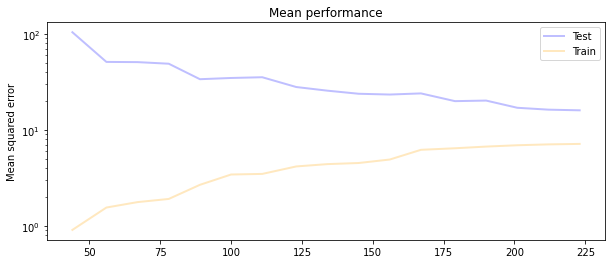

In [27]:
f_learn, ax = plt.subplots(figsize=(10,4))
ax.plot(train_sizes,-test_scores.mean(1), alpha=0.25, linewidth=2, label ='Test', color='blue')
ax.plot(train_sizes,-train_scores.mean(1),alpha=0.25, linewidth=2, label='Train', color='orange')

ax.set_title('Mean performance')
ax.set_ylabel('Mean squared error')
ax.set_yscale('log')
ax.legend()

## Learning curves (4)

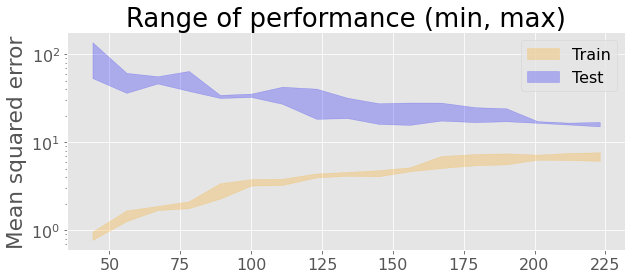

In [62]:
f_learn, ax = plt.subplots(figsize=(10,4))
plot_info = [(train_scores, 'Train','orange'), (test_scores, 'Test','blue')]
for scores, label, color in plot_info: 
    ax.fill_between(train_sizes, -scores.min(1), -scores.max(1), 
                    alpha=0.25, label =label, color=color)

ax.set_title('Range of performance (min, max)')
ax.set_ylabel('Mean squared error')
ax.set_yscale('log')
ax.legend()

## Validation curves (1)
*Can we plot the optimal hyperparameters?*

In [34]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_dev,
                     y=y_dev,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=3)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Validation.nsmallest(1))

lambda
0.017783    15.49007
Name: Validation, dtype: float64


## Validation curves (2)

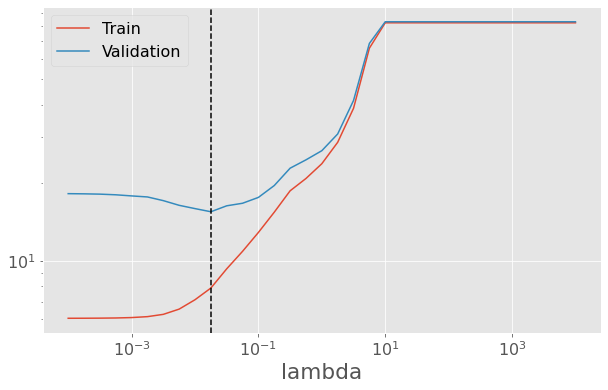

In [74]:
f,ax = plt.subplots(figsize=(10,6))
mse_score.plot(logx=True, logy=True, ax=ax)
ax.axvline(mse_score.Validation.idxmin(), color='black',linestyle='--')

## Grid search (1)
*How do we search for two or more optimal parameters? (e.g. elastic net)*

 - Goal: find the optimal parameter combination: $$\lambda_1^*,\lambda_2^*=\arg\min_{\lambda_1,\lambda_2}MSE^{CV}(X_{train},y_{train})$$

- Option 1: We can loop over the joint grid of parameters.
  - One level for each parameter.
  - Caveats: a lot of code / SLOW

- Option 2: sklearn has `GridSearchCV` has a tool which tests all parameter combinations.

## Grid search (2)
*How does this look in Python?*

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
pipe_el = make_pipeline(PolynomialFeatures(include_bias=False), 
                        StandardScaler(),
                        ElasticNet())
gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':np.logspace(-4,4,10)*2,
                              'elasticnet__l1_ratio':np.linspace(0,1,10)}, 
                  scoring='neg_mean_squared_error', 
                  n_jobs=4,
                  cv=10)

models['ElasicNetCV'] = gs.fit(X_dev, y_dev)

- Notation: double underscore between estimator and hyperparameter, e.g. 'est__hyperparam' 
- Scoring: negative MSE as we're maximizing the score ~ minimize MSE.

## Grid search (3)
*What does the grid search yield?*

In [30]:
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 2))
print()
print('CV params:', gs.best_params_)

Lasso 88.28
Lasso CV 12.4
LinReg 21.32
ElasicNetCV 11.0

CV params: {'elasticnet__alpha': 0.011989685006378818, 'elasticnet__l1_ratio': 0.2222222222222222}


## Grid search (4)
*What if we have 10,000 parameter combinations?*

- Option 1: you buy a cluster on Amazon, learn how to parallelize across computers. 

- Option 2: you drop some of the parameter values

- Option 3: `RandomizedSearchCV` searches a subset of the combinations.

## Miscellanous
*How do we get the coefficient from the models?*

In [38]:
lasso_model = pipe_lassoCV.steps[2][1] # extract model from pipe
lasso_model.coef_[0:13] # extract coeffiecients from model

array([-0.        , -6.52431894,  4.07320182,  2.0938384 ,  0.0645788 ,
       -0.        ,  2.53916687, -0.96926776,  0.        ,  0.        ,
        0.        ,  2.75856804,  0.        ])

# The end
[Return to agenda](#Agenda)

# Code for plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Plots of ML types

In [ ]:
%run ../base/ML_plots.ipynb